In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
print("Success")

Success


In [2]:
df = pd.read_csv('fods_1.csv')
df

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979
...,...,...,...
541,3.326,2.837,4.651
542,3.275,2.727,3.953
543,5.165,3.111,6.219
544,2.859,2.614,4.995


In [3]:
meanX1 = df['MLOGP'].mean()
meanX2 = df['RDCHI'].mean()
meanY = df['quantitative response of LC50'].mean()
stdX1 = df['MLOGP'].std()
stdX2 = df['RDCHI'].std()
stdY = df['quantitative response of LC50'].std()
print(meanX1, meanX2, meanY, stdX1, stdX2, stdY)

2.3134926739926738 2.4922985347985356 4.6584212454212475 1.741797285664983 0.8110039291512505 1.6652150617992907


In [4]:
df['MLOGP'] = (df['MLOGP'] - meanX1)/stdX1
df['RDCHI'] = (df['RDCHI'] - meanX2)/stdX2
df['quantitative response of LC50'] = (df['quantitative response of LC50'] - meanY)/stdY
df

,MLOGP,RDCHI,quantitative response of LC50
0,0.060574,-1.562629,-0.551533
1,0.186306,-1.345614,-0.197225
2,2.001098,0.539703,1.417582
3,1.802453,0.486683,1.239827
4,1.007297,0.327620,0.793038
...,...,...,...
541,0.581300,0.425031,-0.004457
542,0.552020,0.289396,-0.423622
543,1.637106,0.762883,0.937163
544,0.313186,0.150063,0.202123


In [5]:
df.isnull().sum()

MLOGP                            0
RDCHI                            0
quantitative response of LC50    0
dtype: int64

In [6]:
train, test = train_test_split(df, test_size=0.2) # this is a random split
train

,MLOGP,RDCHI,quantitative response of LC50
221,0.714496,-0.634150,1.238026
487,-0.216726,1.676566,2.023510
15,0.308594,-0.620587,-0.675841
508,0.457290,-0.417136,-0.244666
526,-0.371164,-0.568799,-0.117955
...,...,...,...
490,-1.510217,-1.562629,-2.500230
109,0.068612,0.521208,2.345390
383,-0.107069,-0.720463,-0.252473
69,1.794989,2.627239,0.115047


In [7]:
test

,MLOGP,RDCHI,quantitative response of LC50
216,0.166786,-1.254369,-0.719680
187,0.102485,0.205550,1.280062
0,0.060574,-1.562629,-0.551533
159,-0.130034,1.203079,-0.003856
454,-0.196632,-0.025029,-0.683648
...,...,...,...
269,1.813361,0.259803,0.931158
244,0.574411,-0.573732,-0.098138
214,0.561206,-1.163124,0.161288
529,-2.107876,0.666706,-0.934066


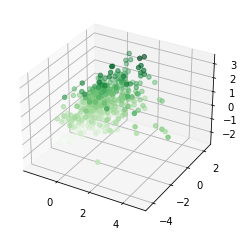

In [8]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = train["quantitative response of LC50"]
xdata = train["RDCHI"]
ydata = train["MLOGP"]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [9]:
dataF = pd.DataFrame(train[["RDCHI", "MLOGP"]])
dataF # x1,x2

,RDCHI,MLOGP
221,-0.634150,0.714496
487,1.676566,-0.216726
15,-0.620587,0.308594
508,-0.417136,0.457290
526,-0.568799,-0.371164
...,...,...
490,-1.562629,-1.510217
109,0.521208,0.068612
383,-0.720463,-0.107069
69,2.627239,1.794989


In [10]:
targetF = pd.DataFrame(train["quantitative response of LC50"])
targetF # t

,quantitative response of LC50
221,1.238026
487,2.023510
15,-0.675841
508,-0.244666
526,-0.117955
...,...
490,-2.500230
109,2.345390
383,-0.252473
69,0.115047


In [11]:
# Value order to be followed: x1,x2, x1^2,x1x2,x2^2, x1^3,x1^2x2,x1x2^2,x2^3.... meant for all degrees of gradient descent
valX = dataF[dataF.columns[:]].to_numpy()

for i in range(2,10):
    for j in range(i+1):
        k = i-j
        valX1 = (valX[:,0]**k)*(valX[:,1]**j)
        valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX = np.append(np.ones((np.shape(valX)[0],1)), valX, axis=1)

valY = targetF[targetF.columns[:]].to_numpy()
print(np.shape(valY))
print(np.shape(valX))
# valX is the nd array of target values and their exponents, valY is the respective Yn for every x1n and x2n

print(valX[0,1])


(436, 1)
(436, 55)
-0.634150484741511


In [12]:
testX = pd.DataFrame(test[["RDCHI", "MLOGP"]])
testY = pd.DataFrame(test['quantitative response of LC50'])
testX

,RDCHI,MLOGP
216,-1.254369,0.166786
187,0.205550,0.102485
0,-1.562629,0.060574
159,1.203079,-0.130034
454,-0.025029,-0.196632
...,...,...
269,0.259803,1.813361
244,-0.573732,0.574411
214,-1.163124,0.561206
529,0.666706,-2.107876


In [13]:
testY

,quantitative response of LC50
216,-0.719680
187,1.280062
0,-0.551533
159,-0.003856
454,-0.683648
...,...
269,0.931158
244,-0.098138
214,0.161288
529,-0.934066


In [14]:
# Value order to be followed: x1,x2, x1^2,x1x2,x2^2, x1^3,x1^2x2,x1x2^2,x2^3.... meant for all degrees to make measure errors
testXVal = testX[testX.columns[:]].to_numpy()

for i in range(2,10):
    for j in range(i+1):
        k = i-j
        testXVal1 = (testXVal[:,0]**k)*(testXVal[:,1]**j)
        testXVal = np.append(testXVal, np.column_stack([testXVal1]), axis = 1)

testXVal = np.append(np.ones((np.shape(testXVal)[0],1)), testXVal, axis=1)

testYVal = testY[testY.columns[:]].to_numpy()
print(np.shape(testYVal))
print(np.shape(testXVal))
# valX is the nd array of target values and their exponents, valY is the respective Yn for every x1n and x2n


(110, 1)
(110, 55)


In [15]:
# Unregularised training errors to be noted
trainErr = []
testErr = []

In [ ]:
def computeCost(data, theta):# E(w)
    m = len(data)
    X = data[:,0:-1]
    y = data[:,-1].reshape(-1, 1)
    
    J = np.sum((np.dot(X, theta) - y)**2) / (2 * m)
    
    return J

In [ ]:
def gradDes(data, theta, alpha, num_iters):
    m = len(data)
    X = data[:,0:-1]
    y = data[:,-1].reshape(-1, 1)
    J_history = np.zeros(num_iters)
    
    for iter in range(num_iters):
        delta = np.dot(X.T, (np.dot(X, theta) - y))
        theta = theta - (alpha/m)*delta
        J_history[iter] = computeCost(data, theta)
        
    return theta, J_history

In [ ]:
def getW(degree):
    wSize = int((degree+1)*(degree+2)/2)
    w = np.zeros(wSize) # theta
    